In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading data and performing analysis on it.

### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
import missingno as msno

### Reading the csv file from Gdrive

In [3]:
data = pd.read_csv("/content/drive/MyDrive/YouTubeComment/Scrapped Comments/datacomment.csv")
print(data.shape)
data.head()

(522478, 5)


,user_id,comment,likes,rank,source
0,Nishant Rawat,I think only Ranjit is there who doesn’t go af...,19.0,1,Geekyranjit
1,BT20MEC110 Aniket Turkel,I hope I can expect the unboxing of the space ...,5.0,2,Geekyranjit
2,Sumant Ukkali,Eagerly waiting for space edition & yes this l...,NaN,3,Geekyranjit
3,Ruler Of Heavens,Ranjit seems to be very happy about receiving ...,2.0,4,Geekyranjit
4,KN SM,Sir if possible please include the battery lif...,1.0,5,Geekyranjit


### Removal of Duplicate Rows

In [4]:
a = data.shape[0]
data = data[~data.duplicated(subset=['comment'],keep='first')].sort_values(by=['comment'],ascending=False)
b = data.shape[0]
print("Number of rows deleted: {}".format(a-b))
print("Number of rows after duplicate removal: {}".format(data.shape[0]))
print("% of data removed: {}".format((a-b)*100/a))

Number of rows deleted: 25341
Number of rows after duplicate removal: 497137
% of data removed: 4.850156370220373


##### Observation  


*   About 25K rows were found to be duplicates. We dropped all those rows as they won't add values to our dataset.








### Missing Value Plot

user_id      1138
comment         1
likes      389015
rank            0
source          0
dtype: int64


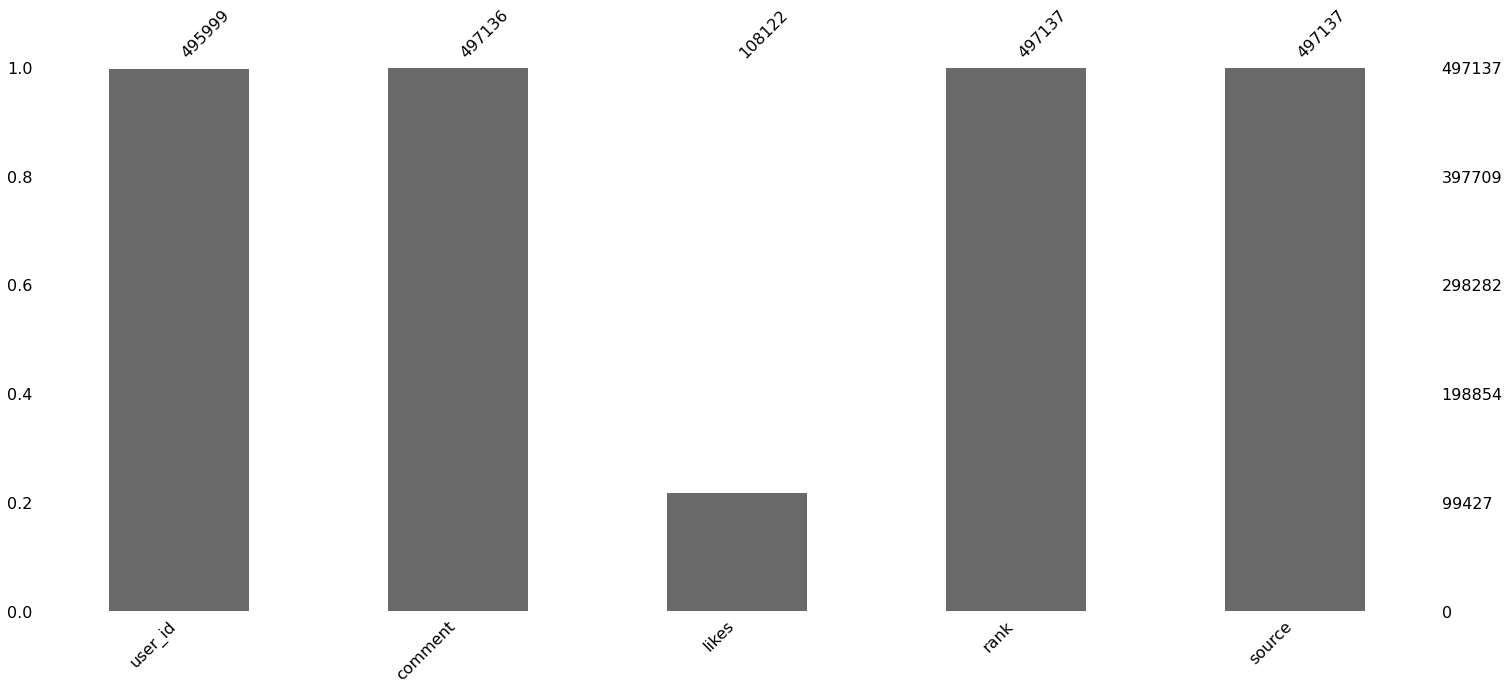

In [5]:
print(data.isnull().sum())
plt.figure(figsize=(10,6))
msno.bar(data.sample(data.shape[0]))

In [6]:
# data['user_id'].fillna(value="Anonymus",inplace=True)
data['comment'].fillna(value=" ",inplace=True)

In [7]:
print(data[data['user_id'].isnull()].shape)
data[data['user_id'].isnull()].head()

(1138, 5)


,user_id,comment,likes,rank,source
41046,NaN,🤩 Really Informative ✌🔥,1,12,Geekyranjit
19236,NaN,😍🥰 Thank you @Geekyranjit!,26,3,Geekyranjit
265105,NaN,📝,NaN,872,Geekyranjit
406943,NaN,💜💜💜💜,NaN,224,Geekyranjit
190388,NaN,👉👉To DOSTO Channel Promotion Start ho Gya Hai ...,2,858,Geekyranjit


In [8]:
print(data.isnull().sum())

user_id      1138
comment         0
likes      389015
rank            0
source          0
dtype: int64


# Removing Emoji character.

In [9]:
import re

def removeEmoji(data):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    comment =  re.sub(emoji_pattern, '', data)
    return comment

In [10]:
data['likes'].fillna(value=0,inplace=True)
print(data.isnull().sum())
data.head()

user_id    1138
comment       0
likes         0
rank          0
source        0
dtype: int64


,user_id,comment,likes,rank,source
75572,Kartik Arora,🧡💜💙,0,190,Geekyranjit
224456,Pankaj Rana,"🧠🤦‍♂️ If this year Asus didn't bring us new 5,...",52,413,Geekyranjit
92020,Alex Shimla,🥺🥺 Only samsung was one vendor that was not pu...,0,712,Geekyranjit
186519,Shubham Sanket Swain,🥺 Want to know about updates. By the way does ...,0,247,Geekyranjit
149586,Aniket Kalbhor,🥶Amazing piece of Tech,0,369,Geekyranjit


In [11]:
data['comment'] = data['comment'].apply(lambda x:removeEmoji(x))
data.head()

,user_id,comment,likes,rank,source
75572,Kartik Arora,,0,190,Geekyranjit
224456,Pankaj Rana,"If this year Asus didn't bring us new 5,000 -...",52,413,Geekyranjit
92020,Alex Shimla,Only samsung was one vendor that was not push...,0,712,Geekyranjit
186519,Shubham Sanket Swain,Want to know about updates. By the way does t...,0,247,Geekyranjit
149586,Aniket Kalbhor,Amazing piece of Tech,0,369,Geekyranjit


# Removing all comments whose length is less than or equal to 2

In [12]:
data['comment'] = data['comment'].apply(lambda x: x if len(x) > 2 else np.nan)
data.dropna(subset=['comment'],inplace=True)
print(data.isnull().sum())

user_id    1136
comment       0
likes         0
rank          0
source        0
dtype: int64


# Dropping the 'source' and 'ranking' columns.

In [13]:
data.drop(columns=['source','rank'],inplace=True)
print(data.shape)
data.head()

(496425, 3)


,user_id,comment,likes
224456,Pankaj Rana,"If this year Asus didn't bring us new 5,000 -...",52
92020,Alex Shimla,Only samsung was one vendor that was not push...,0
186519,Shubham Sanket Swain,Want to know about updates. By the way does t...,0
149586,Aniket Kalbhor,Amazing piece of Tech,0
455964,Twitch- xjuiceboxtwitch,JUST BOUGHT BLUE 1,1.0


In [14]:
dir = "/content/drive/MyDrive/YouTubeComment/preprocessedcomment.csv"
if os.path.isfile(dir):
    print("Saving...")
    data.to_csv("/content/drive/MyDrive/YouTubeComment/preprocessed.csv",index=False)
    print("File Saved.")
else:
    print("File already exist !!")

File already exist !!
